## Homework 4
*For any questions or concerns please post them in the discussion board of Camino*
### Due - 03/03/2019 - 11:59p - 50 points

**Name:** `<Jacob Amedie>`

**Email** `<jamedie@scu.edu>`

**Objectives:** The aim of this homework is to make you conversant with logistic regression concept. You have to apply logistic regression on the dataset provided using `sklearn` library. Before that you have to perform exploratory data analysis to make sure you can understand the data, which columns are not useful etc. 

**Problem Statement:** You are provided with data that is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. You have to perform  classification on this data using `Logistic Regression` to predict if the client will subscribe a term deposit (variable y). 

The original dataset is available at [UCI Bank Marketing Data](https://archive.ics.uci.edu/ml/datasets/bank+marketing#). For more detailed description about the dataset, please look at the site to know the attributes. 

I have modified `y` and transformed it into either `1` or `0` for your convenience. This time I have NOT provided a separate `test.csv` to test your result. Your task would be to split the data into train and test by using [`train-test-split` of sklearn module](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), where $70\%$ of data will be used for training the model and $30\%$ for testing.

At the end, you have to present your evaluation in terms of [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). 

Please *note* that, for this homework, you are expected to do some extra readings to know more features of scikit learn package.

**Submission Instructions:** 
* Please download `hw4.ipynb` and `banking.csv` files and insert cells in the `hw4.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw4`. Please feel free to use the `week7-LogisticRegression.ipynb` as a reference to work on this homework.

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. The aim of this in-class exercise is to warm you up with basic linear regression concept. You have to implement univariate linear regression from scratch using the data set provided.

In [32]:
# import libraries - pandas, numpy, matplotlib, seaborn, sklearn's different modules
# TODO
%matplotlib inline

import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# using scikit-learn here
import sklearn.linear_model as lm
import seaborn as sbn
from sklearn import preprocessing
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sbn.set(style="white")
sbn.set(style="whitegrid", color_codes=True)

In [33]:
# read 'banking.csv' into pandas dataframe
# TODO
df = pd.read_csv('banking.csv')

In [34]:
# drop the missing values from the dataframe
# TODO
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

age            job   marital            education  default  housing  \
0       44    blue-collar   married             basic.4y  unknown      yes   
1       53     technician   married              unknown       no       no   
2       28     management    single    university.degree       no      yes   
3       39       services   married          high.school       no       no   
4       55        retired   married             basic.4y       no      yes   
5       30     management  divorced             basic.4y       no      yes   
6       37    blue-collar   married             basic.4y       no      yes   
7       39    blue-collar  divorced             basic.9y       no      yes   
8       36         admin.   married    university.degree       no       no   
9       27    blue-collar    single             basic.4y       no      yes   
10      34      housemaid    single    university.degree       no       no   
11      41     management   married    university.degree       no      yes   
12      55     management   married    university.degree       no       no   
13      33       services  divorced          high.school       no      yes   
14      26         admin.   married          high.school       no       no   
15      52       services   married          high.school  unknown      yes   
16      35       services   married          high.school       no       no   
17      27         admin.    single    university.degree       no       no   
18      28    blue-collar   married             basic.9y  unknown       no   
19      26     unemployed    single             basic.9y       no      yes   
20      41     unemployed   married             basic.9y  unknown      yes   
21      35    blue-collar    single              unknown       no       no   
22      40         admin.   married    university.degree  unknown      yes   
23      32     technician    single  professional.course       no       no   
24      41    blue-collar   married          high.school       no      yes   
25      34   entrepreneur    single    university.degree       no      yes   
26      49     technician  divorced              unknown       no      yes   
27      37         admin.   married          high.school       no      yes   
28      35    blue-collar   married             basic.6y  unknown      yes   
29      38    blue-collar    single             basic.4y  unknown       no   
...    ...            ...       ...                  ...      ...      ...   
41158   30       services   married          high.school  unknown  unknown   
41159   47         admin.  divorced          high.school  unknown       no   
41160   57     management  divorced    university.degree  unknown      yes   
41161   43    blue-collar   married          high.school  unknown       no   
41162   43  self-employed   married          high.school  unknown      yes   
41163   22    blue-collar    single             basic.9y       no      yes   
41164   33     technician    single  professional.course       no      yes   
41165   56         admin.   married              unknown       no      yes   
41166   31         admin.   married              unknown       no      yes   
41167   30         admin.    single          high.school       no       no   
41168   29    blue-collar    single             basic.9y  unknown      yes   
41169   46     technician   married             basic.9y       no       no   
41170   32     technician    single    university.degree       no      yes   
41171   42         admin.   married          high.school  unknown       no   
41172   27    blue-collar    single             basic.9y  unknown      yes   
41173   39  self-employed   married          high.school       no      yes   
41174   49   entrepreneur   married    university.degree       no       no   
41175   46    blue-collar   married             basic.4y  unknown      yes   
41176   30    blue-collar    single             basic.9y       no      yes   
41177   52  self-employed    

In [35]:
# print the dimensions of dataframe
df.shape

(41188, 21)

In [36]:
# print the columns or features of the data
# TODO
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [37]:
# print the columns or features of the data
# TODO
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp_var_rate', u'cons_price_idx',
       u'cons_conf_idx', u'euribor3m', u'nr_employed', u'y'],
      dtype='object')

In [38]:
# print first few rows of data
# TODO
df.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

# Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

*NOTE*: The education column of the dataset has many categories and we need to reduce the categories for a better modelling. 

Understand the dataset and make required changes to this field. *Some hints*: You could group them into one category. For example, group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

Similarly look for other columns which you can process!

In [70]:
df['job']=np.where(df['job']=='entrepreneur' ,'Business-Owner',df['job'])
df['job']=np.where(df['job']=='self-employed','Business-Owner',df['job'])
df['job']=np.where(df['job']=='admin'      ,'Managerial',df['job'])
df['job']=np.where(df['job']=='management' ,'Managerial',df['job'])
df['job']=np.where(df['job']=='technician' ,'Blue-Collar',df['job'])
df['job']=np.where(df['job']=='blue-collar','Blue-Collar',df['job'])
df['job']=np.where(df['job']=='housemaid'  ,'Blue-Collar',df['job'])

df['job'].unique()

array(['Blue-Collar', 'Managerial', 'services', 'retired', 'admin.',
       'unemployed', 'Business-Owner', 'unknown', 'student'], dtype=object)

In [40]:
df['education']=np.where(df['education']=='basic.4y','basic',df['education'])
df['education']=np.where(df['education']=='basic.6y','basic',df['education'])
df['education']=np.where(df['education']=='basic.9y','basic',df['education'])

df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [41]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

### Data exploration
Perform exploratory data analysis here. I want you to think for different possibilities. It might vary from student to student. I would prefer you to come up with your own ideas for this part and be creative!!!

*Some hints*: 
* you can check for how many 0's and 1's in `y`, plot a histogram
* can compute percentage of `subscription` and percentage of `no subscription`, and plot
* you can group by mean of different attributes to see the pattern from the dataset
* you can plot purchase frequency for job title
* you can plot stacked bar chart for marital status vs job title etc, as you feel necessary
* Month might be a good predictor of the outcome variable, so you can draw a histogram


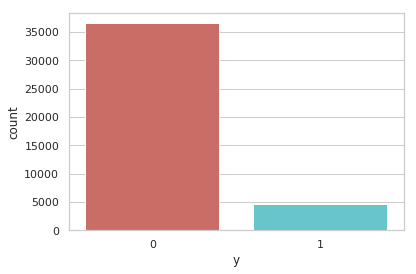

In [42]:
# TODO - insert as many cells as needed!
# counts how many 0's and 1's in y
sbn.countplot(x='y',data=df, palette='hls')
plt.show()

In [43]:
# Compute percentage of subscription and percentage of no subscription, and plot
subscription = len(df[df['y']==1])
no_subscription = len(df[df['y']==0])

print no_subscription
print subscription
#len(df[df['y']==1])

subscription_percentage = subscription/float(subscription+no_subscription)
no_subscription_percentage = no_subscription/float(subscription+no_subscription)
print("subscription percentage = ", subscription_percentage*100)
print("no subscription percentage = ", no_subscription_percentage*100)

36548
4640
('subscription percentage = ', 11.265417111780131)
('no subscription percentage = ', 88.73458288821988)


In [45]:
# group by mean of different attributes to see the pattern from the dataset
df.groupby('y').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
y                                                         
0       93.603757     -40.593097   3.811491  5176.166600  
1       93.354386     -39.789784   2.123135  5095.115991

In [57]:
df.groupby('job').mean()

age    duration  campaign       pdays  previous  \
job                                                                     
Blue-Collar     39.113959  258.510408  2.566419  976.412952  0.135713   
Business-Owner  40.847063  263.699687  2.597497  978.972541  0.141119   
Managerial      42.362859  257.058140  2.476060  962.647059  0.185021   
admin.          38.187296  254.312128  2.623489  954.319229  0.189023   
housemaid       45.500000  250.454717  2.639623  960.579245  0.137736   
retired         62.027326  273.712209  2.476744  897.936047  0.327326   
services        37.926430  258.398085  2.587805  979.974049  0.154951   
student         25.894857  283.683429  2.104000  840.217143  0.524571   
unemployed      39.733728  249.451677  2.564103  935.316568  0.199211   
unknown         45.563636  239.675758  2.648485  938.727273  0.154545   

                emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job                                                                      
Blue-Collar         0.259774       93.616534     -40.765356   3.792399   
Business-Owner      0.126834       93.582953     -40.890719   3.740867   
Managerial         -0.012688       93.522755     -40.489466   3.611316   
admin.              0.015563       93.534054     -40.245433   3.550274   
housemaid           0.433396       93.676576     -39.495283   4.009645   
retired            -0.698314       93.430786     -38.573081   2.770066   
services            0.175359       93.634659     -41.290048   3.699187   
student            -1.408000       93.331613     -40.187543   1.884224   
unemployed         -0.111736       93.563781     -40.007594   3.466583   
unknown             0.357879       93.718942     -38.797879   3.949033   

                nr_employed         y  
job                                    
Blue-Collar     5175.629162  0.085516  
Business-Owner  5173.528259  0.094891  
Managerial      5166.650513  0.112175  
admin.          5164.125350  0.129726  
housemaid       5179.529623  0.100000  
retired         5122.262151  0.252326  
services        5171.600126  0.081381  
student         5085.939086  0.314286  
unemployed      5157.156509  0.142012  
unknown         5172.931818  0.112121

In [58]:
df.groupby('education').mean()

age    duration  campaign       pdays  previous  \
education                                                                    
basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
education                                                                     
basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr_employed         y  
education                                   
basic                5172.014113  0.087029  
high.school          5164.994735  0.108355  
illiterate           5171.777778  0.222222  
professional.course  5170.155979  0.113485  
university.degree    5163.226298  0.137245  
unknown              5159.549509  0.145003

**Visualizations** - plot necessary illustrations here. Identify the attributes which could be good or bad predictor of the outcome variables, and play around with that.

Text(0,0.5,u'purchase frequency')

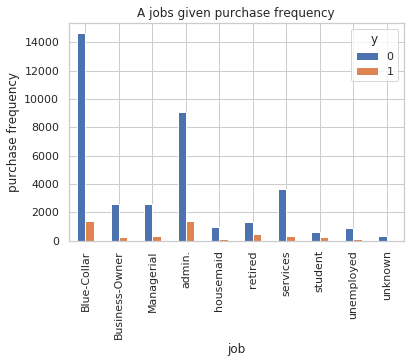

In [46]:
# Plot purchase frequency for job title
# TODO
#job title might be a good predictor for outcome var y, since the
# job title affects your spending haits, thus the frequency you make purchases 

pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('A jobs given purchase frequency')
plt.xlabel('job')
plt.ylabel('purchase frequency')

Text(0.5,0,u'marriage status')

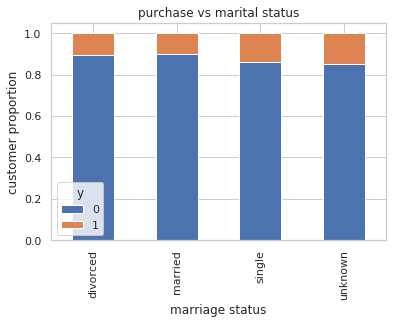

In [47]:
# plot stacked bar chart for marital status vs job title etc, as you feel necessary
# maritial status does'nt seem to be a good indicator of var y
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('purchase vs marital status')
plt.ylabel('customer proportion')
plt.xlabel('marriage status')

Text(0.5,0,u'education')

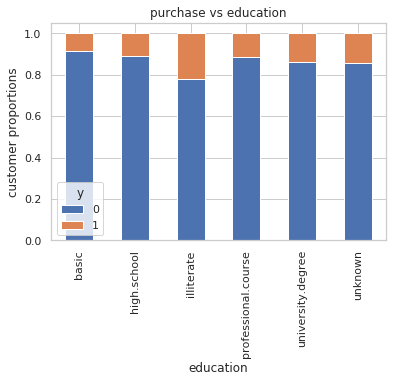

In [48]:
# Month might be a good predictor of the outcome variable, so you can draw a histogram
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('purchase vs education')
plt.ylabel('customer proportions')
plt.xlabel('education')

#### Logistic Regression Model Fitting

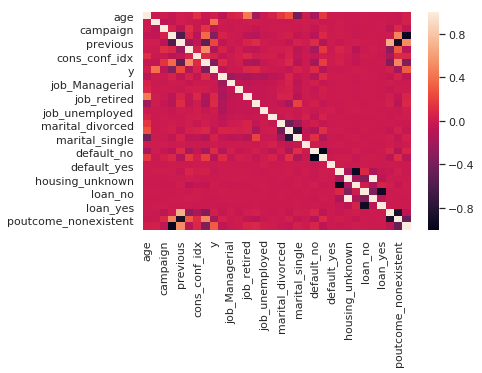

In [65]:
# import logistic regression
# Now its time for you to split your data into train and test
# fit your model
# TODO
df2 = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
df2.drop(df2.columns[[9,12, 16, 18, 21 ]], axis=1, inplace=True)
df2.columns

sbn.heatmap(df2.corr())
plt.show()

In [66]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [67]:
X_train.shape

(28831, 35)

In [68]:
# compute prediction using the test data
# TODO
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: wed

### Confusion Matrix

In [ ]:
# learn what is confusion matrix
# use sklearn's confusion_matrix and print it 
# TODO
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

In [ ]:
# print sklearn's classification report, which should have
# precision, recall, f1-score atleast
# you should explore this feature yourself
# TODO
from sklearn.metrics import classification_report
y_true = [2, 0, 1, 0, 1]
y_pred = [1, 2, 1, 0, 2]
target_names = ['class 5', 'class 6', 'class 7']
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
# (ROC curve is optional - you might want to give it a shot if you want to know more.)
# TODO - optional